In [31]:
import pandas as pd
import sys
import pyfolio as pf
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
#读取资金曲线数据，FMZ平台下载，累计收益数据
df=pd.read_csv(filepath_or_buffer='./return.csv')
#转换为日期格式

df['Date'] = pd.to_datetime(df['Date'],format = "%Y-%m-%d %H:%M:%S")
df_data = df.groupby([df['Date'].dt.date])['returns'].sum()
df = pd.DataFrame({'Date':df_data.index, 'returns':df_data.values})

print(df)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
#处理好的收益数据
returns = df['returns'].tz_localize('UTC')
print(returns)
#调用pyfolio的API计算并输出资金曲线分析结果图
#returns参数是必须的，其余参数可以不输入
pf.create_full_tear_sheet(returns)
plt.show()



          Date   returns
0   2022-10-08 -0.007037
1   2022-10-09  0.006067
2   2022-10-10 -0.019667
3   2022-10-11 -0.003630
4   2022-10-13  0.006741
5   2022-10-15 -0.002049
6   2022-10-20  0.008456
7   2022-10-28  0.014257
8   2022-11-07 -0.019058
9   2022-11-08 -0.057603
10  2022-11-10  0.039414
11  2022-11-13 -0.008702
12  2022-11-14  0.011379
13  2022-11-21 -0.013395
14  2022-11-22  0.026052
Date
2022-10-08 00:00:00+00:00   -0.007037
2022-10-09 00:00:00+00:00    0.006067
2022-10-10 00:00:00+00:00   -0.019667
2022-10-11 00:00:00+00:00   -0.003630
2022-10-13 00:00:00+00:00    0.006741
2022-10-15 00:00:00+00:00   -0.002049
2022-10-20 00:00:00+00:00    0.008456
2022-10-28 00:00:00+00:00    0.014257
2022-11-07 00:00:00+00:00   -0.019058
2022-11-08 00:00:00+00:00   -0.057603
2022-11-10 00:00:00+00:00    0.039414
2022-11-13 00:00:00+00:00   -0.008702
2022-11-14 00:00:00+00:00    0.011379
2022-11-21 00:00:00+00:00   -0.013395
2022-11-22 00:00:00+00:00    0.026052
Name: returns, dtype: flo

Start date,2022-10-08
End date,2022-11-22
Total months,0
,Backtest
Annual return,-31.3%
Cumulative returns,-2.2%
Annual volatility,35.7%
Sharpe ratio,-0.88
Calmar ratio,-4.15
Stability,0.32
Max drawdown,-7.6%


IndexError: index -1 is out of bounds for axis 0 with size 0

In [11]:
[f for f in dir(pf.plotting) if 'plot_' in f]


['plot_annual_returns',
 'plot_capacity_sweep',
 'plot_cones',
 'plot_daily_turnover_hist',
 'plot_daily_volume',
 'plot_drawdown_periods',
 'plot_drawdown_underwater',
 'plot_exposures',
 'plot_gross_leverage',
 'plot_holdings',
 'plot_long_short_holdings',
 'plot_max_median_position_concentration',
 'plot_monthly_returns_dist',
 'plot_monthly_returns_heatmap',
 'plot_monthly_returns_timeseries',
 'plot_perf_stats',
 'plot_prob_profit_trade',
 'plot_return_quantiles',
 'plot_returns',
 'plot_rolling_beta',
 'plot_rolling_returns',
 'plot_rolling_sharpe',
 'plot_rolling_volatility',
 'plot_round_trip_lifetimes',
 'plot_sector_allocations',
 'plot_slippage_sensitivity',
 'plot_slippage_sweep',
 'plot_turnover',
 'plot_txn_time_hist',
 'show_and_plot_top_positions']

In [9]:
print(sum(df['returns']))

-0.09138088518793755


In [102]:
%matplotlib inline
import datetime
import quantstats as qs
df=pd.read_csv(filepath_or_buffer='./return.csv')
#转换为日期格式
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x : x.replace(tzinfo = None))
#df['Date'] = pd.to_datetime(df['Date'],format = "%Y-%m-%d %H:%M:%S", unit="ns", utc=True)
# df_data = df.groupby([df['Date'].dt.date])['returns'].sum()
# df = pd.DataFrame({'Date':df_data.index, 'returns':df_data.values})
print(df[['Date']].info())
# print(df)
# df['Date'] = pd.to_datetime(df['Date'],format = "%Y-%m-%d %H:%M:%S")
df.set_index('Date', inplace=True)
#处理好的收益数据
qs.extend_pandas()
df = df.squeeze()
# fetch the daily returns for a stock
#stock = qs.utils.download_returns('AAPL')
# show sharpe ratio
qs.stats.sharpe(df)
print(type(df))
# or using extend_pandas() :)
df.sharpe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    430 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.5 KB
None
<class 'pandas.core.series.Series'>


-0.5889439067511372

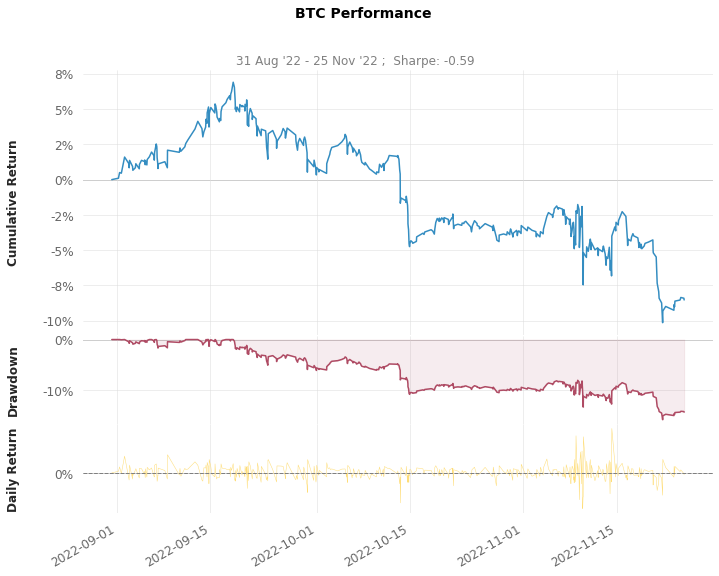

In [82]:
qs.plots.snapshot(df, title='BTC Performance')


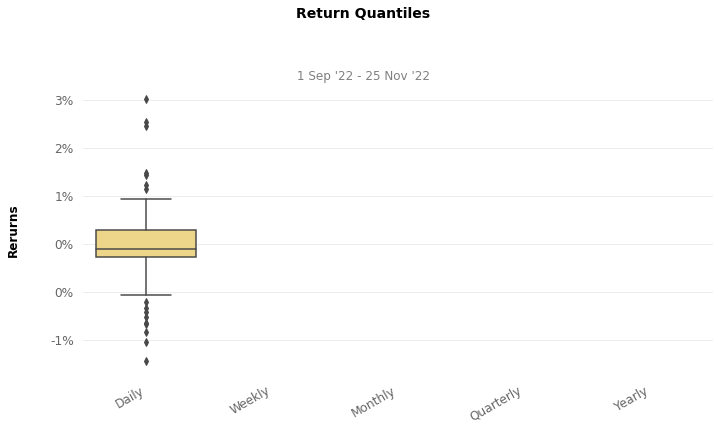

In [77]:
qs.plots.distribution(df)


In [89]:
df.index.info()

AttributeError: 'DatetimeIndex' object has no attribute 'info'

In [107]:
qs.reports.html(df,'BTC-USD')


TypeError: Cannot compare dtypes datetime64[ns, UTC] and datetime64[ns]

In [104]:
%matplotlib inline
import quantstats as qs

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('AAPL')
print(type(stock))
# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :
stock.sharpe()
qs.reports.html(stock, "SPY")


<class 'pandas.core.series.Series'>


TypeError: Invalid comparison between dtype=datetime64[ns, America/New_York] and datetime

In [84]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
